In [110]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances_argmin,pairwise_distances
from sklearn.mixture import GaussianMixture

In [148]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#2. Get the file
downloaded = drive.CreateFile({'id':"1dYYy9hoCO-hbNxL2lyun19WTD3eR-4qs"})   # replace the id with id of file you want to access
downloaded.GetContentFile('estaturasnormales.csv')
downloaded

GoogleDriveFile({'id': '1dYYy9hoCO-hbNxL2lyun19WTD3eR-4qs', 'kind': 'drive#file', 'etag': '"MTYyNjc0MTMzMzc5NQ"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1dYYy9hoCO-hbNxL2lyun19WTD3eR-4qs', 'webContentLink': 'https://drive.google.com/uc?id=1dYYy9hoCO-hbNxL2lyun19WTD3eR-4qs&export=download', 'alternateLink': 'https://drive.google.com/file/d/1dYYy9hoCO-hbNxL2lyun19WTD3eR-4qs/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1dYYy9hoCO-hbNxL2lyun19WTD3eR-4qs/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'estaturasnormales.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2021-07-20T00:29:32.493Z', 'modifiedDate': '2021-07-20T00:35:33.795Z', 'modifiedByMeDate': '2021-07-20T00:35:33.795Z', 'lastViewedByMeDate': '2021-07-20T05:18:10.661Z', 'markedViewedByMeDate':

In [149]:
estaturas_data = pd.read_csv('estaturasnormales.csv')
estaturas_data.head()

,Estatura(metros),Edad(años)
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32


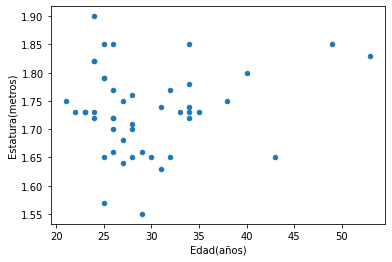

In [150]:
estaturas_data.plot.scatter(x = "Edad(años)",y="Estatura(metros)")

In [73]:
rng = np.random.RandomState()
print(estaturas_data.shape[0])
i = rng.permutation(estaturas_data.shape[0])[:4]
centers = estaturas_data.loc[i]
print(centers)
labels = pairwise_distances_argmin(estaturas_data, centers)
print(labels)
new_centers = np.array([estaturas_data.iloc[labels == i].mean(0)
                                for i in range(4)])
print(new_centers)

46
    Estatura(metros)  Edad(años)
32              1.74          34
24              1.75          38
9               1.75          21
17              1.57          25
[3 0 3 0 0 3 3 0 3 2 2 3 3 3 3 0 3 3 3 3 0 1 3 3 1 0 3 3 3 0 3 3 0 0 1 3 3
 2 2 1 3 0 0 1 3 3]
[[ 1.72666667 32.83333333]
 [ 1.776      44.6       ]
 [ 1.735      22.25      ]
 [ 1.7264     26.08      ]]


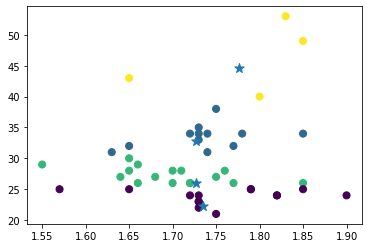

In [100]:
colores=['red','green','blue','cyan','yellow']
asignar=[]
#for row in labels:
#    asignar.append(colores[row])
            
plt.scatter(x =estaturas_data["Estatura(metros)"] ,y=estaturas_data["Edad(años)"], c=labels,
            s=50, cmap='viridis')
plt.scatter(new_centers[:, 0], new_centers[:, 1], marker='*', s=100)

Estatura(metros)      0.187398
Edad(años)          127.372863
dtype: float64


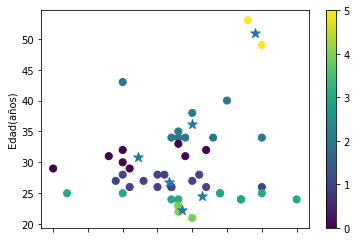

In [151]:
def Kmeans(X, k):
    # 1. Randomly choose clusters
    rng = np.random.RandomState()
    i = rng.permutation(X.shape[0])[:k]
    centers = X.loc[i]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X.iloc[labels == i].mean(0)
                                for i in range(k)])
       
        distance = 0
        for i in range(0,k):
          cluster = np.where(labels == i)
         
          #test = pairwise_distances(X.iloc[cluster], new_centers[i,:])
          distance += np.sum(np.power(X.iloc[cluster] - new_centers[i, :], 2))
          
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels,distance

centers, labels,distance = Kmeans(estaturas_data, 6)
estaturas_data.plot.scatter(x ="Estatura(metros)" ,y="Edad(años)", c=labels,
            s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=100)
print(distance)

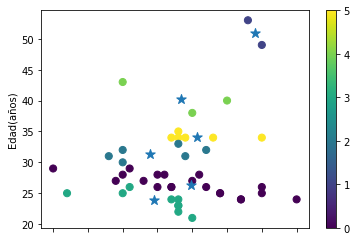

In [152]:
def GMM(X, k):
    gm = GaussianMixture(n_components=k, random_state=0).fit(X)
    centers= gm.means_
    labels = gm.predict(X)
    distance = 0
    distance2 = 0
    for i in range(0, k):
        cluster = np.where(labels == i)
        distance += np.sum(np.power(X.iloc[cluster] - centers[i, :], 2))
    return centers, labels,distance,gm

centers, labels,distance,gm = GMM(estaturas_data, 6)
estaturas_data.plot.scatter(x ="Estatura(metros)" ,y="Edad(años)", c=labels,
            s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=100)

**Experimentos**

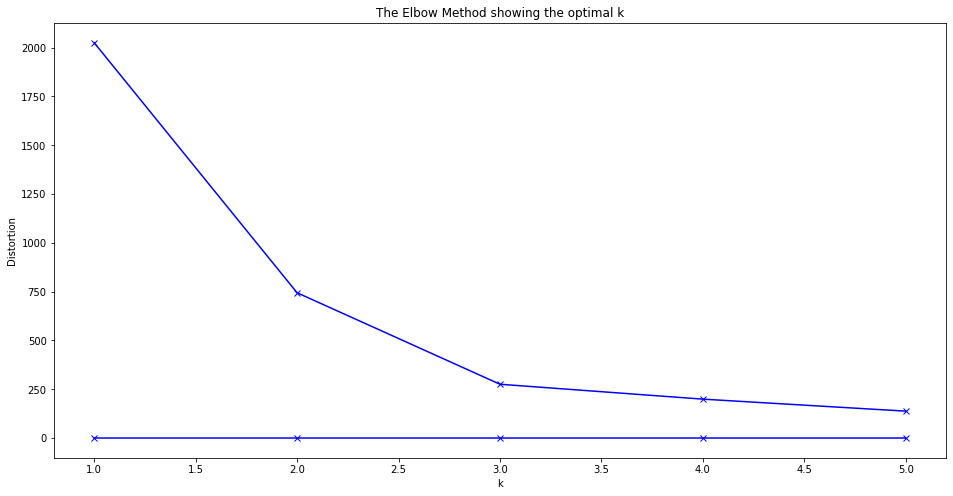

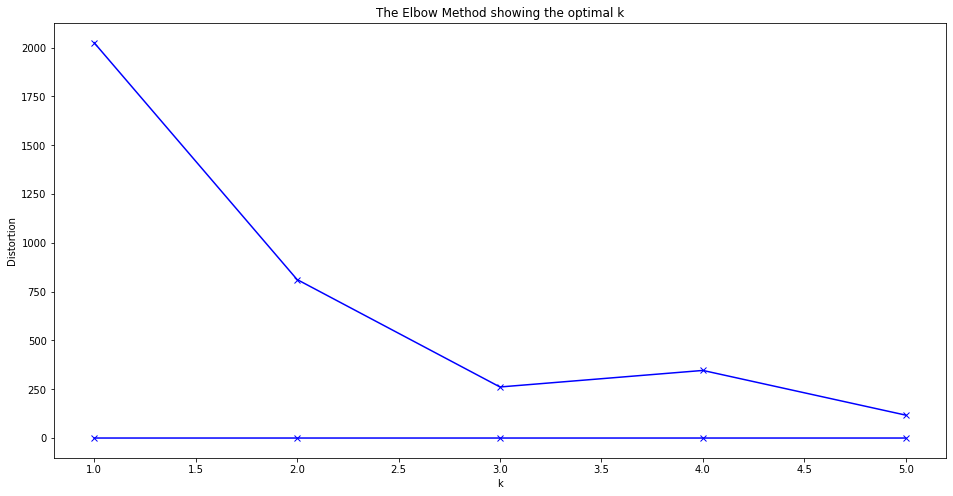

In [153]:
 distortions = []
 distortions2 = []
 K = range(1,6)
 for k in K:
    centers, labels,distance = Kmeans(estaturas_data, k)
    centers2, labels2,distance2,gm = GMM(estaturas_data, k)
    distortions.append(distance)
    distortions2.append(distance2)
  
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

plt.figure(figsize=(16,8))
plt.plot(K, distortions2, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

La tecnica del codo puede ser de gran utilidad en este problema ya que no se conoce de antemano las categorias o grupos, en hambas graficas podemos observar un grupo de 3 en la grafica de codo. 

In [154]:
#2. Get the file
downloaded = drive.CreateFile({'id':"1ISsfa6zMWQvYplimKVm2MXZpvSvYGaGa"})   # replace the id with id of file you want to access
downloaded.GetContentFile('estaturasvaltest.csv')
downloaded

GoogleDriveFile({'id': '1ISsfa6zMWQvYplimKVm2MXZpvSvYGaGa', 'kind': 'drive#file', 'etag': '"MTYyNjc1Nzk0MzI4NA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1ISsfa6zMWQvYplimKVm2MXZpvSvYGaGa', 'webContentLink': 'https://drive.google.com/uc?id=1ISsfa6zMWQvYplimKVm2MXZpvSvYGaGa&export=download', 'alternateLink': 'https://drive.google.com/file/d/1ISsfa6zMWQvYplimKVm2MXZpvSvYGaGa/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1ISsfa6zMWQvYplimKVm2MXZpvSvYGaGa/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'estaturasvaltest.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2021-07-20T05:10:40.869Z', 'modifiedDate': '2021-07-20T05:12:23.284Z', 'modifiedByMeDate': '2021-07-20T05:12:23.284Z', 'lastViewedByMeDate': '2021-07-20T05:10:40.869Z', 'markedViewedByMeDate': 

In [155]:
estaturasvaltest_data = pd.read_csv('estaturasvaltest.csv')
estaturasvaltest_data.head()

,Estatura(metros),Edad(años)
0,1.82,25
1,1.80,27
2,1.60,31
3,1.60,35
4,1.82,30


In [160]:
### predict Kmeans
centers, labels,distance = Kmeans(estaturas_data, 3)
labels = pairwise_distances_argmin(estaturasvaltest_data, centers)
print(labels)

[1 1 2 2 2 2 2 2]


In [159]:
## predict GMM
centers2, labels2,distance2,gm2 = GMM(estaturas_data, 3)
gm2.predict_proba(estaturasvaltest_data)

array([[9.99992415e-01, 1.02546836e-36, 7.58509458e-06],
       [9.98461524e-01, 4.42003078e-29, 1.53847647e-03],
       [4.64402866e-01, 2.66373681e-07, 5.35596868e-01],
       [1.23393764e-02, 2.70463994e-02, 9.60614224e-01],
       [5.30902848e-01, 1.44381263e-22, 4.69097152e-01],
       [4.97945508e-03, 5.09227334e-15, 9.95020545e-01],
       [5.22175109e-02, 1.50538348e-18, 9.47782489e-01],
       [3.74740565e-01, 8.38139893e-08, 6.25259351e-01]])